<a href="https://colab.research.google.com/github/anammagalhaes/anammagalhaes/blob/main/Machine_Learning_para_detec%C3%A7%C3%A3o_de_fraudes_em_cart%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção de fraudes em cartão de crédito usando Machine Learning**

### **Contextualização**

Atualmente, o principal meio de pagamentos adotado por consumidodores é via cartão. Ao mesmo tempo que esta opção garante vantagens à empresa que fornece o produto/serviço e ao consumidor, traz também o inconveniente de terem que lidar com problemas relacionados as fraudes. Cabe, portanto, utilizar de estratégias e de monitoramento para evitar ser surpreendido este tipo de situação. Fraudes em cartões de crédito podem acarretar ao estabelecimento consideráveis, por outro lado, falsos positivos de fraudes envolvendo bloqueio de cartão, causa constrangimento ao consumidor. 

Em vista disso, a Inteligência Artificial e suas ferramentas tem se destacado a medida que oferece como estratégia, o desenvolvimento de modelos preditivos baseados em dados históricos dos consumidores. O desafio, portanto, para a Data Science e instituições financeiras é aprimorar os algoritmos, cada vez mais, visando inibir ou evitar transações fraudulentas, o que de fato, pode apresentar economia e mais segurança aos estabelecimentos. 

Este projeto utiliza dados provenientes de algumas empresas européias de cartão de crédito. O dataset representa as operações financeiras que aconteceram no período de dois dias, onde foram identificadas 492 fraudes em meio a quase 290 mil transações. Foram empregadas as bibliotecas Pandas e Numpy para tratamento e limpeza dos dados, Matplotlib e Seaborn para visualizações e Sciktlearn para desenvolver o modelo de Regressão Logistica que será capaz de classificar os eventos em fraudulentos ou não.  

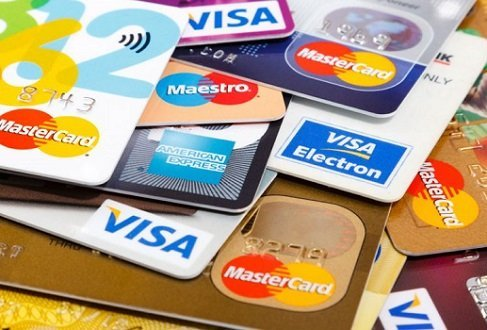

### **Banco de Dados**

O banco de dados foi obtido do Kaggle, em [Credit Card Fraud Detection](https://https://www.kaggle.com/mlg-ulb/creditcardfraud). As variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).

A PCA consiste em interações entre as variáveis e o seu resultado permite a redução da dimensionalidade mantendo o maior número possível de informações. Assim, o algoritmo encontra um conjunto novo de recursos - os chamados componentes, o que melhora o treinamento do modelo. 

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas [V1,V2,V3…,V28].

A variável "Time" contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. A variável 'Amount' é a quantidade de  transações. Já a variável 'Classe' é a variável resposta e assume o valor 1 em caso de fraude e 0 em caso contrário.


## **Importando os pacotes**

In [ ]:
# instalar Pandas Profiling
!pip install scikit-plot -q

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [ ]:
# importar os dados para um dataframe 

file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)

## **Análise Exploratória**

In [ ]:
# Análise das primeiras entradas 

df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Podemos avaliar como os dados estão distribuidos e levantar a hipótese de que não há valores ausentes nestas entradas (pelo menos), apesar de estar analisando somente as primeiras 10 entradas, geralmente isso já nos permite sugerir quais as próximas análises. 
Além disso, aparentemente as variáveis são do tipo float, mas isto também será verificado posteriormente. 

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

As variáveis são do tipo float, exceto a variável "Class" que está classificada em 1 e 0 em formato int. A verificação do formato das variáveis é importante para a padronização e alimentação do modelo. 

In [ ]:
# ver se há valores ausentes para limpeza

df.isnull().sum().max()

0

Como foi suposto anteriormente, acabamos de confirmar que realmente, no banco de dados não há valores ausentes. Fazer esta análise é impressindível pois existem modelos que não funcionam com dados ausentes. 

In [ ]:
# ver o resumo estatístico 

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Sendo,

**count** - Contagem de valor da variável;

**mean** - Média dos valores da variável; 

**std** - Desvio padrão; 

**min** - Valor mínimo presente na coluna;

**25%** - 25% dos valores presentes na coluna;

**50%**- 50% dos valores presentes na coluna (mediana);

**75%** - 75% dos valores presentes na coluna;

**max** - Valor máximo presente na coluna;


Uma questão importante que pode ser vista pela análise estatística é que 75% das entradas na variável "Class" são preenchidas com valor 0, ou seja, não fraudulentas. Portanto, pode-se sugerir que os dados da variável alvo ("Class") estão desbalanceados. Para confirmar, podemos fazer uma análise do balanceamento das classes.

.
A discrepância entre as classes interfere no desempenho do modelo, e se realmente houver, será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.


0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

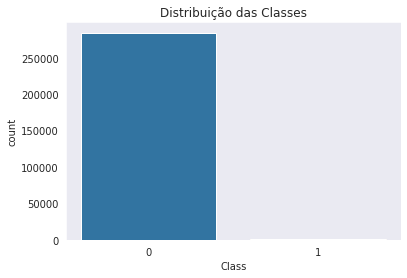

In [ ]:
# ver o balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

A partir do gráfico de barras, é nítido que as classes estão extremamente desbalanceadas. As fraudes, representadas pelo número 1, representam apenas 0,17%, do total de Distribuição das Classes, aproximadamente. Portanto, dé necessário realizar uma etapa de balanceamento para minimizar essa discrepância.

A fim de comparar as distribuições das duas classes (normal 0, e fraude 1) ao longo do tempo (variável "Time") foram plotados dois histogramas, relacionando tempo com a variável "Transações". No entanto, não foi identificada nenhuma informação a partir das distribuições de frequência abaixo.

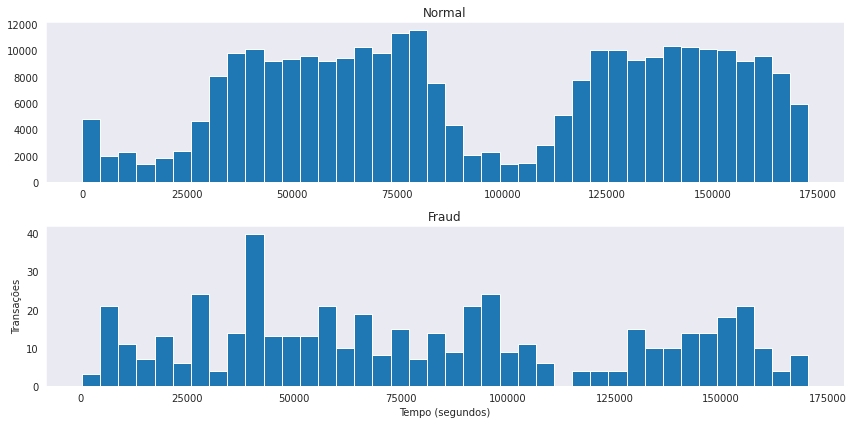

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Seguindo a análise exploratória, foram plotados os boxplots para analisar, de fato, a diferença na distribuição das duas classes. Portanto, foram analisados em relação à dimensão "Amount", que é a quantidade de transações.

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de machine learning.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


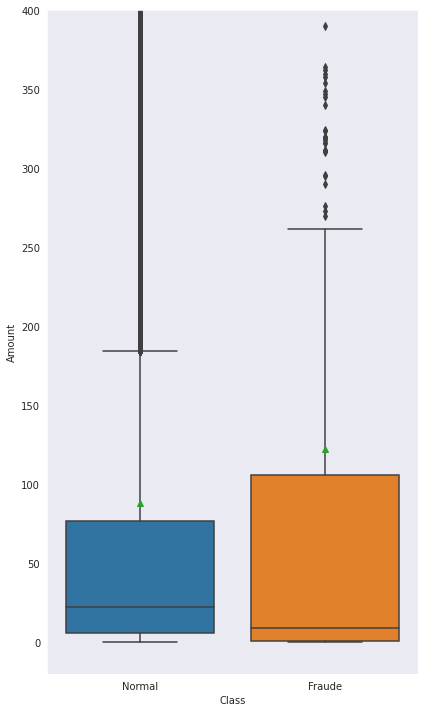

In [ ]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout();

Ainda, para verificar essa diferença na distribuição, é bom realizar uma análise estatística das classes na variável "Amount". Aqui foi analisado numeros menores que 2000 e a diferença nas métricas é bastante visível. Isso explica a configuração dos boxplots. Há muitos registros na classe "normal" ou 0 em comparação com o de "fraudes" ou 1, e isso pode ser visualizado por "count", que é a contagem do valor da variável "Amount" nessas classes.  



In [ ]:
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()


count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
df[(df.Class == 0) & (df.Amount < 2000)]['Amount'].describe()  

count    283625.000000
mean         80.544926
std         172.631931
min           0.000000
25%           5.550000
50%          21.970000
75%          76.120000
max        1999.890000
Name: Amount, dtype: float64

O gráfico de dispersão é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.  Então foram plotados estes gráficos para as classes e todas as variáveis, exceto "Amount" e "Time". 



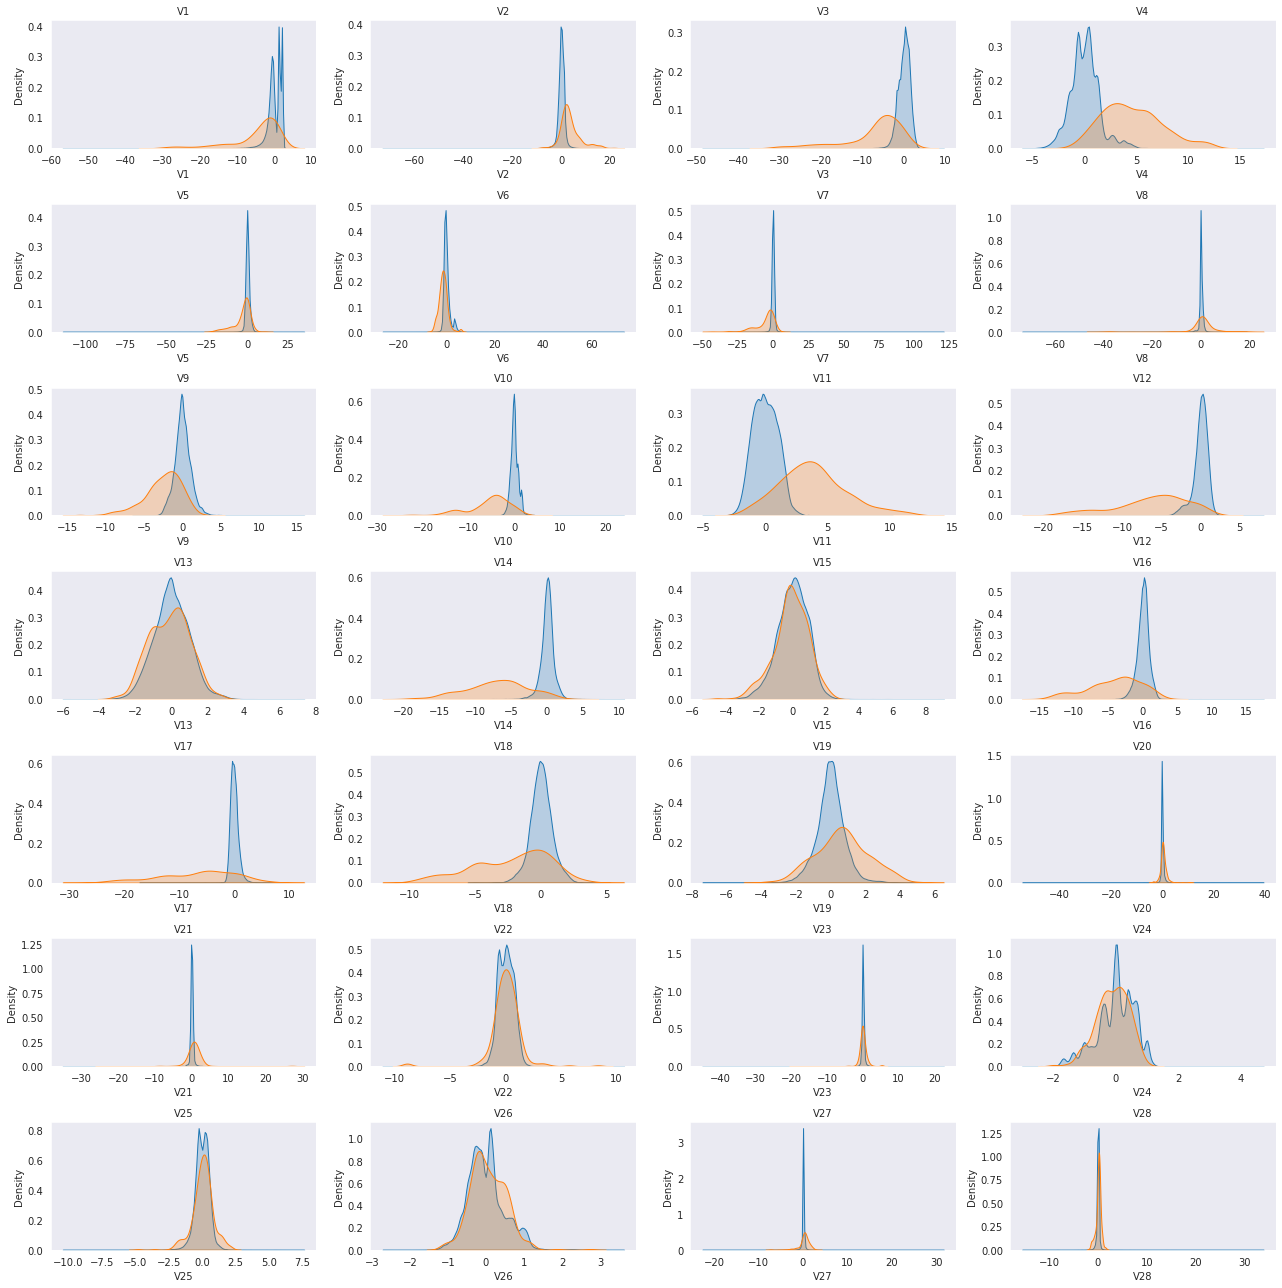

In [ ]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis V3, V4, V10 e V11, como elas são bem distintas.



Resumidamente, algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:

* O *dataset* está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais, ou seja, uma das etapas de preparação dos dados para treinamento do modelo será o balanceamento das classes. 
* Não existem valores ausentes ou nulos no *dataframe*.

* Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as *features* originais foram padronizadas. Ou seja, as variáveis estão na mesma ordem de grandeza. 

* As colunas `Time` e `Amount` não estão normalizadas, ou padronizadas???. DUVIDA: elas precisavam ser normalizadas? eu sei que elas precisam quando os dados na variável não estão entre si na mesma ordem de grandeza ou quando todos os dados de todas as variaveis não estão na mesma ordem de grandeza? 

"Já normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1"



## **Preparação dos dados**

Como foi mencionado anteriormente, é necessário preparar os dados para alimentar o modelo de Regresssão Logística e classificar os eventos em fraudulentos ou não. Desta forma, a etapa de preparação dos dados irá seguir a seguinte sequência: 

As variáveis "Time" e "Amount" serão padronizadas, pois estão em outra ordem de grandeza; 
Dividir entre dados de treino e teste; 
Balancear as classes 1 e 0, a fim de evitar uma baixa performance para a classe 1, que está em menor proporção, o que poderia acarretar em overfitting.

In [ ]:
# Padronização das features Time e Amount que estão em outra ordem de grandeza com StandartScaler - normaliza, padroniza ou os dois? 

df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1)) # A padronização coloca entre -1 e 1 ou isso é normalização? 
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))    # aqui foram criadas as variáveis padronizadas/normalizadas e depois excluidas as variáveis Time e Amount originais. 

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Antes de proceder com o balanceamento de dados, é necessário "splitar" (dividir) os dados entre treino e teste. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado. 

Para garantir que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente, utilizamos stratify=True e shuffle para "embaralhá-los". 

In [ ]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

#porque não especifica o tamanho do banco de teste? 
# dividir o dataset entre treino e teste = train_test_split(X, y, stratify=y, shuffle=True)
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)


Usando a biblioteca imblearn é possível aplicar facilmente técnicas de balanceamento de dados. A opção neste projeto foi usar Under-sampling, a qual preserva a classe minoritária, que são a classe 1 de fraudulentos.



1    369
0    369
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


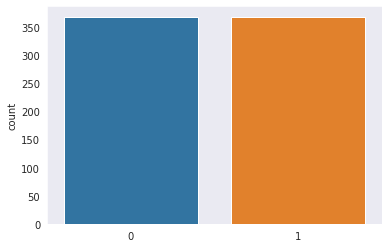

In [ ]:
# usar técnica under-sampling, sendo agora X_rus e y_rus os dados das variáveis independentes e da variável alvo balanceados, pertencentes ao banco de dados de treino. 
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)     

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus) ; 

É notável que não há mais aquela discrepância inicial, vista pelo gráfico de barras das classes no início da Análise Exploratória. 



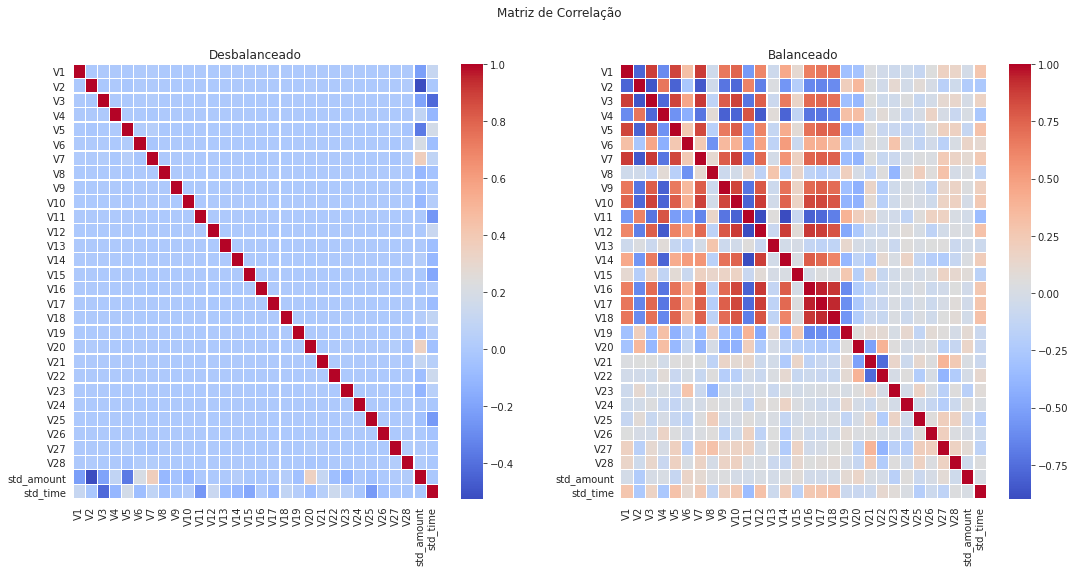

In [ ]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Com os dados balanceados, uma matriz de correlação é importante para avaliar  quais variáveis estão mais fortemente relacionadas com as outras. Abaixo, foram plotadas duas matrizes, uma antes de balancear os dados e uma após o balanceamento. Antes, por exemplo, é complicado extrair informações relevantes, e depois, já é visível que algumas variáveis possuem interações mais fortes do que com outras. 


## **Desenvolvendo o Modelo de Machine Learning**

Após uma análise exploratória completa e os dados preparados, é hora de iniciar a construção de um classificador usando a Regressão Logística.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em X_rus e y_rus, que são os dados de treino balanceados. Na sequência, serão realizadas as previsões sobre os dados de teste. 

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.

A partir da matriz de confusão pode ser observada a taxa de acertos para transações fraudulentes, ou pela coluna recall do Relatório de Classificação.

Uma outra métrica considerada interessante para se avaliar a eficácia é a AUC ROC, ou área sob a curva. No caso desse modelo de Regressão Logística, tem-se 95% de AUC.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9644    0.9818     71079
           1     0.0427    0.9187    0.0816       123

    accuracy                         0.9643     71202
   macro avg     0.5213    0.9415    0.5317     71202
weighted avg     0.9982    0.9643    0.9802     71202

Acurácia: 0.9643

AUC: 0.9415



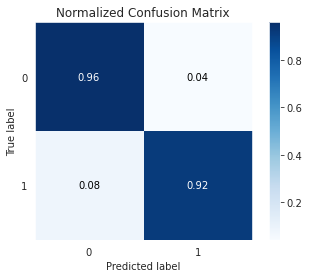

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

### **Conclusões** 

Os dados já haviam sido manipulados, tratados e limpos, visto que não havia valores ausentes e as variáveis reduzidas a componentes pelo PCA, apesar de as classes estarem bastante desbalanceadas. 

Como em qualquer problema, testar novos algoritmos de classificação é sempre uma alternativa para a otimização da predição. Nesse banco de dados, a performance do modelo dado pela boa acurárica próxima a 0,97, e, analisando também f1 score, recall e precisão, pode-se verificar que ele atinge o objetivo. Outros algoritmos podem também ser aplicados no sentido de melhorar ainda mais a predição para este problema, assim como a otimização de parâmetros também contribuiria neste sentido. 

 

